In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
# to use this you will have to install pandasql to your environment
# use: pip install pandasql
from pandasql import sqldf as sq
# call the lambda function pysqdf to run a querry on one of the tables using SQL, there are examples in the code further down
pysqdf = lambda q: sq(q, globals())

In [3]:
pkl_names = [    "genomeScores",
        "genomeTags",
        "links",
        "movies",
        "tags",
        "ratings"]


genomeScores = pd.read_pickle('pickle/genomeScores.pkl')
genomeTags = pd.read_pickle('pickle/genomeTags.pkl')
links = pd.read_pickle('pickle/links.pkl')
movies = pd.read_pickle('pickle/movies.pkl')
tags = pd.read_pickle('pickle/tags.pkl')
#you will need to make the ratings.pkl file, watch the tutorial that Ryan Put in the discord on how to make that. 
# try - except statement, if the part in the try errors out it will run the code in except, if the try code succeeds it will not run the except code. Google search for more information
try:
    ratings = pd.read_pickle('pickle/ratings.pkl')
    # creates a list of all the pkl files
    all_pkls = [    genomeScores,
        genomeTags,
        links,
        movies,
        tags,
        ratings]
except: 
    print("there is no ratings.pkl file in the pickle folder")
    try:
        ratings_csv = pd.read_csv('ml-25m/ratings.csv')
        # if there is no pkl file for raings add it as a csv file
        all_pkls = [    genomeScores,
            genomeTags,
            links,
            movies,
            tags,
            ratings_csv]
    except:
        print("raings.csv not found in the folder ml-25")
        # if there is no csv or pkl file for ratings do not include it in the list
        all_pkls = [    genomeScores,
            genomeTags,
            links,
            movies,
            tags]


In [4]:
# As it is the genres column of the movies table is delimited with |, ex: 1 "Movie title" action|horror
# this changes it to be multiple rows instead it would be : 1 "Movie Title" action, 1 "Movite Title" horror

movies_split = movies.loc[movies.index.repeat(movies.genres.str.count('\|') + 1)].assign(genres=np.concatenate(movies.genres.str.split('|')))
#movies_split.to_csv("movie_genres.csv")

In [5]:
movies_split.to_csv("test.csv")

In [6]:
genomeScores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [7]:
print(genomeTags)

      tagId           tag
0         1           007
1         2  007 (series)
2         3  18th century
3         4         1920s
4         5         1930s
...     ...           ...
1123   1124       writing
1124   1125         wuxia
1125   1126          wwii
1126   1127        zombie
1127   1128       zombies

[1128 rows x 2 columns]


In [8]:
print( links)

       movieId   imdbId    tmdbId
0            1   114709     862.0
1            2   113497    8844.0
2            3   113228   15602.0
3            4   114885   31357.0
4            5   113041   11862.0
...        ...      ...       ...
62418   209157  6671244  499546.0
62419   209159   297986   63407.0
62420   209163  6755366  553036.0
62421   209169   249603  162892.0
62422   209171    55323   79513.0

[62423 rows x 3 columns]


In [9]:
print(movies)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                              

In [10]:
try: 
    print("ratings as a pkl: ", ratings.describe().transpose())
except: 
    try:
        print("ratings as a csv: ", ratings_csv)
    except: 
        print("ratings does not excist as a csv or a pkl, please add it")


ratings as a pkl:                  count          mean           std          min           25%  \
userId     25000095.0  8.118928e+04  4.679172e+04          1.0  4.051000e+04   
movieId    25000095.0  2.138798e+04  3.919886e+04          1.0  1.196000e+03   
rating     25000095.0  3.533854e+00  1.060744e+00          0.5  3.000000e+00   
timestamp  25000095.0  1.215601e+09  2.268758e+08  789652009.0  1.011747e+09   

                    50%           75%           max  
userId     8.091400e+04  1.215570e+05  1.625410e+05  
movieId    2.947000e+03  8.623000e+03  2.091710e+05  
rating     3.500000e+00  4.000000e+00  5.000000e+00  
timestamp  1.198868e+09  1.447205e+09  1.574328e+09  


In [11]:
print(tags)

         userId  movieId                  tag   timestamp
0             3      260              classic  1439472355
1             3      260               sci-fi  1439472256
2             4     1732          dark comedy  1573943598
3             4     1732       great dialogue  1573943604
4             4     7569     so bad it's good  1573943455
...         ...      ...                  ...         ...
1093355  162521    66934  Neil Patrick Harris  1427311611
1093356  162521   103341     cornetto trilogy  1427311259
1093357  162534   189169               comedy  1527518175
1093358  162534   189169             disabled  1527518181
1093359  162534   189169              robbery  1527518193

[1093360 rows x 4 columns]


## Print the number of null values in every pkl file

In [12]:
for iter in range(len(all_pkls)):
        print(f"The table {pkl_names[iter]} has {len(all_pkls[iter][all_pkls[iter].isnull().any(axis=1)])} null values")


The table genomeScores has 0 null values
The table genomeTags has 0 null values
The table links has 107 null values
The table movies has 0 null values
The table tags has 16 null values
The table ratings has 0 null values


## Check for outliers in dataset

In [13]:
# q is a SQL query, format it like below and then you call pysqdf(q) and pass in your query "q" to run your query on the dataframes you specify
# in general for SQL, words that are all capitalized are build into the SQL language, things that have lowercase letters are parts of you database/dataframe

# Checking genomeScore for outliers on min and max
# Check the top 
q = """SELECT *
    FROM genomeScores
    WHERE relevance <> 1
    ORDER BY relevance DESC
    LIMIT 10;"""
q2 = """SELECT *
    FROM genomeScores
    WHERE relevance <> 1
    ORDER BY relevance
    LIMIT 10;"""
print(pysqdf(q))
print(pysqdf(q2))


   movieId  tagId  relevance
0       44   1075    0.99975
1      150    944    0.99975
2      356    752    0.99975
3      903    511    0.99975
4      904    511    0.99975
5      965    511    0.99975
6     1213    741    0.99975
7     1231    944    0.99975
8     1241    956    0.99975
9     1245    224    0.99975
   movieId  tagId  relevance
0     5789   1080    0.00025
1     6923   1080    0.00025
2   137062   1002    0.00025
3   147940    219    0.00025
4      763    119    0.00050
5      787    106    0.00050
6      795    680    0.00050
7      887    119    0.00050
8      895    104    0.00050
9      985    119    0.00050


In [14]:
# Checking genomeTags for outliers on min and max
# Check the top 
q = """SELECT *
    FROM genomeTags
    ORDER BY tag DESC
    LIMIT 10;"""
# Check the bottom 10
q2 = """SELECT *
    FROM genomeTags
    ORDER BY tag
    LIMIT 10;"""
print(pysqdf(q))
print(pysqdf(q2))

   tagId             tag
0   1128         zombies
1   1127          zombie
2   1126            wwii
3   1125           wuxia
4   1124         writing
5   1123         writers
6   1122   writer's life
7   1121    world war ii
8   1120     world war i
9   1119  world politics
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
5      6         1950s
6      7         1960s
7      8         1970s
8      9         1980s
9     10  19th century


In [15]:
# Checking tags for outliers on min and max
# Check the top 10 timestamps
q = """SELECT *
    FROM tags
    ORDER BY timestamp DESC
    LIMIT 10;"""
# Check the bottom 10 timestamps
q2 = """SELECT *
    FROM tags
    ORDER BY timestamp
    LIMIT 10;"""
print(pysqdf(q))
print(pysqdf(q2))

   userId  movieId           tag   timestamp
0  123527   201594       villain  1574316696
1  123527   201594  country life  1574316682
2  123527   201594     farmhouse  1574316680
3  123527   201594          farm  1574316678
4  123527   201594        kansas  1574316676
5  123527   201594      thriller  1574316667
6  123527   201594        sci-fi  1574316666
7  123527   201594        horror  1574316664
8  123527   201594          gore  1574316613
9  123527   201594  supernatural  1574316603
   userId  movieId              tag   timestamp
0  129396     2788     monty python  1135429210
1  129396     1732    coen brothers  1135429236
2  129396     1206  stanley kubrick  1135429248
3  129396     1193   jack nicholson  1135429371
4  129396     5004    peter sellers  1135429399
5  129396       47        brad pitt  1135429412
6  129396       47   morgan freeman  1135429412
7  129396     4011        brad pitt  1135429431
8  129396     4011      guy ritchie  1135429431
9  129396       32     br

In [16]:
# Checking ratings for outliers on min and max
# Shows a users average ratings for all their reviews and the number of reviews they have made
q = """SELECT userId, avg(rating) as avg_rating, count(movieId) as review_count
    FROM ratings
    group by userId;"""
ratings_summary = pysqdf(q)


In [17]:
ratings_summary.to_csv("ratings_summary.csv")

In [18]:
# Checking movies for outliers
# Check the top 10 timestamps
q = """SELECT *
    FROM movies
    order by movieId;"""
print(pysqdf(q))


       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                              

In [19]:
# Checking links for outliers
# Check the top 10 timestamps
q = """SELECT *
    FROM links
    order by movieId;"""

print(pysqdf(q))


       movieId   imdbId    tmdbId
0            1   114709     862.0
1            2   113497    8844.0
2            3   113228   15602.0
3            4   114885   31357.0
4            5   113041   11862.0
...        ...      ...       ...
62418   209157  6671244  499546.0
62419   209159   297986   63407.0
62420   209163  6755366  553036.0
62421   209169   249603  162892.0
62422   209171    55323   79513.0

[62423 rows x 3 columns]


#### Checking the min and max of all tables to see if there are any outliers

- No noticable outliers in genomeTags for tag
- No noticable outliers in genomeTags for relevace
- No noticable outliers in tags for timestamps
- No noticable outliers in the movies table
- No noticable outliers in the links table
- Ratings table: User 72314 has 32202 ratings for different movies, the next highest is user 80973 who has 9178 reviews and many of the higher users are closer to that number. There are also User 75308 has 5525 reviews that are all 5 stars, every other user that has all 5 star reviews are around 100 and the majority are in the 20s of reviews. There are some users that have several thousand reviews and have an average rating of less than 1 star, it could be that they are just picky so these users might not be outliers since there are more than just a few that follow this trend. 





Make a graph that shows which tags are the most common, or if certain users review certain tags more than others

## Graph showing a users average rating and the number of movies they have rated in the dataset

Text(0.5, 1.0, "User's Average Rating Over All Movies Watched")

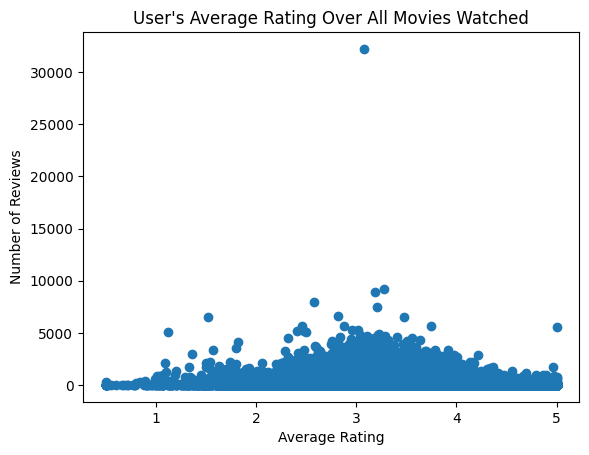

In [20]:
plt.scatter(ratings_summary['avg_rating'], ratings_summary['review_count'])
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.title("User's Average Rating Over All Movies Watched")


As seen in the graph above the userId: 72314 has rated 32202 different movies, which is way higher than any other user (with the next highest being userId 80973 who has 9178 reviews).

Text(0.5, 1.0, "User's Average Rating Over All Movies Watched")

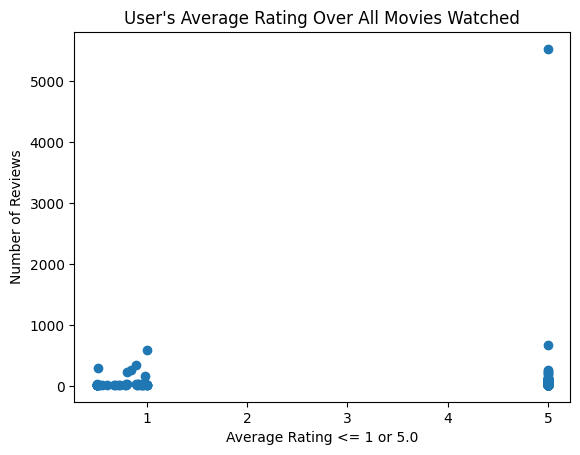

In [21]:
fiveavg = ratings_summary.loc[(ratings_summary['avg_rating'] == 5) | (ratings_summary['avg_rating'] <= 1)]
plt.scatter(fiveavg['avg_rating'], fiveavg['review_count'] )
plt.xlabel("Average Rating <= 1 or 5.0")
plt.ylabel("Number of Reviews")
plt.title("User's Average Rating Over All Movies Watched")

After looking at the above chart it seems like userId 75308 has 5525 reviews that are all 5 stars so they might be an outlier. Their data would not be very useful since they have over 5000 reviews that are all 5 stars so any analysis we do with them might skew our data. 

## Histogram of Tags used

In [22]:
# Checking links for outliers
# Check the top 10 timestamps

q = """SELECT gt.tag as gtTag, gt.tagid, t.tag
    FROM genomeTags as gt
    join tags as t
    on gt.tag = t.tag;"""
# q2 = """SELECT *
# FROM tags
# where tag="sci-fi";"""
tag_count = pysqdf(q)
# print(pysqdf(q2))

In [23]:
tag_count_size = tag_count.groupby(tag_count.columns.tolist(),as_index=False).size()


In [24]:
tag_count_size = tag_count_size.sort_values(['size'])

In [25]:
tag_count_size.to_csv("tag_count_sorted.csv")
#creates a csv of all the tages used. This is the df that is used to create the histogram bellow.

In [26]:
tag_count_size.loc[tag_count_size['size'] < 50, ]

,gtTag,tagId,tag,size
395,francis ford copolla,407,francis ford copolla,1
148,boring!,156,boring!,1
299,disney animated feature,310,disney animated feature,1
284,depp & burton,295,depp & burton,1
1091,writer's life,1122,writer's life,1
...,...,...,...,...
578,lame,594,lame,48
115,beauty pageant,123,beauty pageant,48
805,rabbits,831,rabbits,48
791,prohibition,817,prohibition,49


The table above is just showing that there are 166 different tags that have under 50 uses in the entire dataset. Some of these tags may not be very useful in our later analysis.

[Text(0, 0, '950'),
 Text(0, 0, '81'),
 Text(0, 0, '29'),
 Text(0, 0, '20'),
 Text(0, 0, '8'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

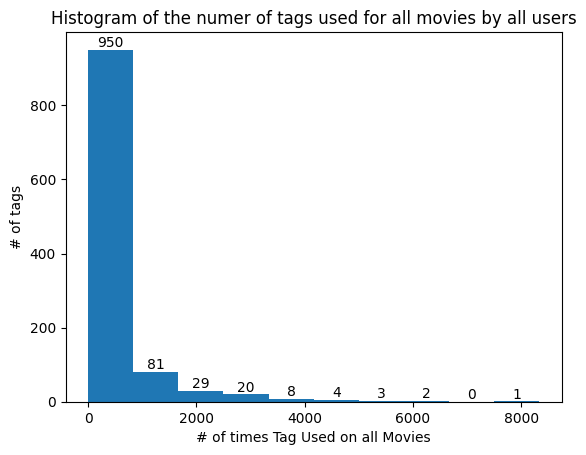

In [27]:
counts, edges, bars = plt.hist(tag_count_size['size'])
plt.xlabel("# of times Tag Used on all Movies")
plt.ylabel("# of tags")

plt.title("Histogram of the numer of tags used for all movies by all users")
plt.bar_label(bars)



The table above is a histogram that shows the number of times each tag was used. So as you can see there were 950 tags that were used less than 1000 times and only 1 tag (sci-fi) that was used around 8000 times. 

# Plot showing which tags were reviewed most by each user


In [28]:
ratings_small = ratings.head(69)
ratings_small

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
64,1,8973,4.0,1147869211
65,1,27193,3.0,1147879774
66,1,27266,4.5,1147879365
67,1,27721,3.0,1147869115


In [29]:
q = """select userId, genres, Max(genreCount), avg_rating from (Select s.userId, m.genres, count(m.genres) as genreCount, avg(s.rating) as avg_rating
    from (SELECT t.userId, t.movieId, t.rating
    FROM ratings_small as t
    group by t.userId, t.movieId) as s
    join movies_split as m
    on s.movieId = m.movieId
    group by userId, genres)as k 
    group by userId;"""
q2 = """Select s.userId, m.genres, count(m.genres) as genreCount, avg(s.rating) as avg_rating
    from (SELECT t.userId, t.movieId, t.rating
    FROM ratings_small as t
    group by t.userId, t.movieId) as s
    join movies_split as m
    on s.movieId = m.movieId
    group by userId, genres;"""

q3 =   """SELECT t.userId, t.movieId, t.rating
    FROM ratings_small as t
    group by t.userId, t.movieId;"""
uid_count = pysqdf(q)
uid_count_inner = pysqdf(q2)
uid_count_inner_inner = pysqdf(q3)

In [30]:
uid_count_inner_inner[uid_count_inner_inner["userId"] == 1]

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
64,1,8973,4.0
65,1,27193,3.0
66,1,27266,4.5
67,1,27721,3.0


In [31]:
uid_count

,userId,genres,Max(genreCount),avg_rating
0,1,Drama,52,3.846154


In [32]:
uid_count_inner

,userId,genres,genreCount,avg_rating
0,1,Action,4,4.125000
1,1,Adventure,11,3.727273
2,1,Animation,2,4.000000
3,1,Children,3,3.833333
4,1,Comedy,22,3.818182
5,1,Crime,8,4.062500
6,1,Documentary,1,2.000000
7,1,Drama,52,3.846154
8,1,Fantasy,5,3.600000
9,1,Film-Noir,1,3.500000


Text(0.5, 1.0, "User 1's Average Rating of Specific Genres")

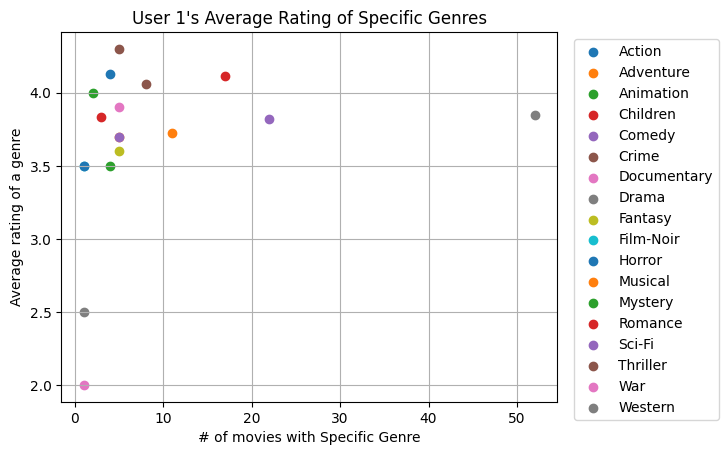

In [33]:

for i in range(0, len(uid_count_inner['genreCount'])):
    plt.scatter(x=uid_count_inner['genreCount'][i], y=uid_count_inner['avg_rating'][i])
plt.grid(True)
plt.legend(uid_count_inner["genres"], bbox_to_anchor=(1.02, 1))
plt.xlabel("# of movies with Specific Genre")
plt.ylabel("Average rating of a genre")
plt.title("User 1's Average Rating of Specific Genres")

The graph above shows how user 1 rated the different genres they watched. This will help us later when we start finding what users like what movies so we can find movies poeple might like based on what they say their favorite genres are. So in this instance we can see that this user watches a lot of Drama and their average rating for that is just under 4.0. So if we have a user looking for Drama movies we can pull up user 1 and see they have watched a lot of Drama and have it rated fairly high, then we can look at just their drama movies they reviewed and see which ones of those have high ratings ( such as 4.0 or higher) and use that to determine what movie we recomend. This could be done on a larger scale by taking into account multiple users and compiling that data to get a better idea of what a good movie might be. 

In [34]:
movies_split[movies_split["movieId"] == 1175]

,movieId,title,genres
1147,1175,Delicatessen (1991),Comedy
1147,1175,Delicatessen (1991),Drama
1147,1175,Delicatessen (1991),Romance


In [35]:
uid_count_inner_inner[uid_count_inner_inner["userId"] == 1]

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
64,1,8973,4.0
65,1,27193,3.0
66,1,27266,4.5
67,1,27721,3.0


In [36]:
uid_count[uid_count['userId'] == 75308]

,userId,genres,Max(genreCount),avg_rating


Text(0.5, 1.0, "User's Average Rating Over All Movies Watched")

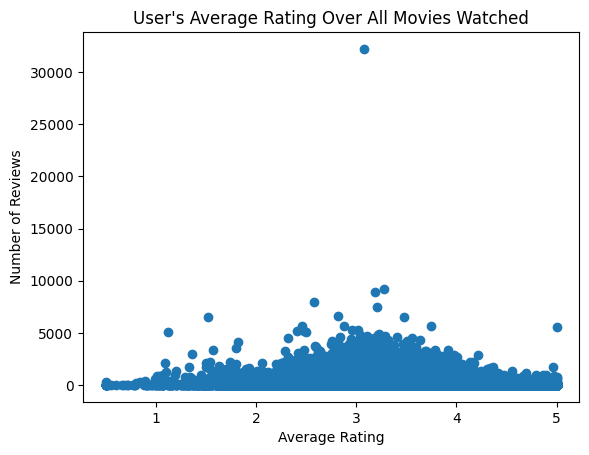

In [37]:
plt.scatter(ratings_summary['avg_rating'], ratings_summary['review_count'])
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.title("User's Average Rating Over All Movies Watched")


# accessing imdb to get year

In [38]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [39]:
# Install this for this to work: pip install imdbpy

# importing the module
import imdb
   
# creating instance of IMDb
ia = imdb.IMDb()
   
# getting the movie with id
search = ia.get_movie("114709")
  
# getting movie year
year = search['year']
  
# printing movie name and year
print(search['title'] + " : " + str(year))

Toy Story : 1995


In [40]:
q = """SELECT gt.tag as gtTag, gt.tagid, t.tag
    FROM genomeTags as gt
    join tags as t
    on gt.tag = t.tag;"""

In [41]:
movies.shape

(62423, 3)

In [42]:
ratings.shape

(25000095, 4)

In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [45]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [46]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


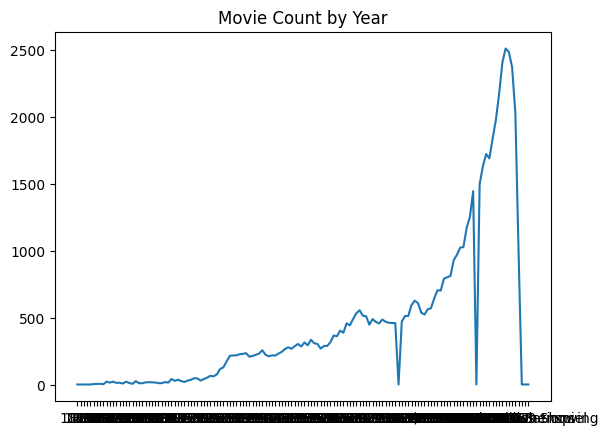

Max No.of Movies Relesed = 2513
year = 2015


count     140.000000
mean      442.971429
std       576.979794
min         1.000000
25%        26.000000
50%       267.000000
75%       517.250000
max      2513.000000
Name: title, dtype: float64

In [74]:
#Plot a Graph with No.of Movies each year corresponding to its year
plt.plot(movies.groupby('year').title.count())
plt.title('Movie Count by Year')
plt.show()
a=movies.groupby('year').title.count()
print('Max No.of Movies Relesed =',a.max())
for i in a.index:
    if a[i] == a.max():
        print('year =',i)
a.describe()

According to the result above, we learn that 2015 has the highest number of movie released with 2531 movies.
On average, there are around 443 movies release per year.

In [48]:
# Seperate the genres Column and Encoding them with One-Hot-Encoding Method.
genres=[]
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    movies[x] = 0
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        movies[x][i]=1
movies.head()

C:\Users\Ping Yuan 2\AppData\Local\Temp\ipykernel_20244\3192875719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[x][i]=1


,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
movies.drop(columns='genres', inplace=True)
movies.sort_index(inplace=True)

In [50]:
movies.head()

,movieId,title,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1995,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adventure    				4145
Animation    				2929
Children    				2935
Comedy    				16870
Fantasy    				2731
Romance    				7719
Drama    				25606
Action    				7348
Crime    				5319
Thriller    				8654
Horror    				5989
Mystery    				2925
Sci-Fi    				3595
IMAX    				195
Documentary    				5605
War    				1874
Musical    				1054
Western    				1399
Film-Noir    				353
(no genres listed)    				5062


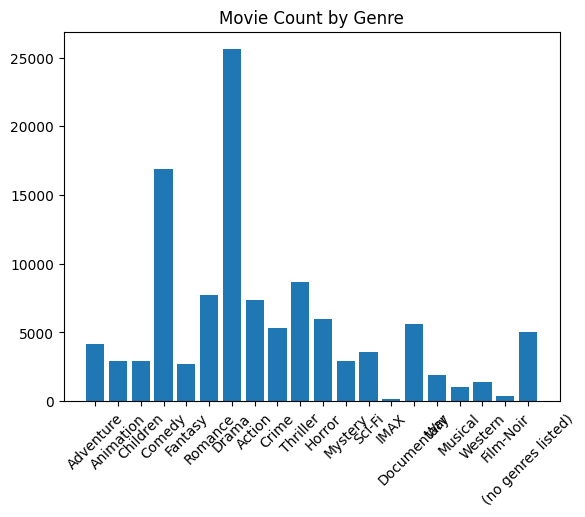

In [71]:
x={}
for i in movies.columns[3:23]:
    x[i]=movies[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))

plt.bar(height=x.values(),x=x.keys())
plt.title('Movie Count by Genre')
plt.xticks(rotation=45)
plt.show()

According to the result above, we learn that drama is the most common movie genre.

In [52]:
len(movies['movieId'].unique())

62423

Since there's no repeating movieId in the movies dataset, we would like to add a column rating for each movieId in the movies dataset; here we use the average rating of each movie in the ratings dataset. We create a new dataset dat.

In [53]:
x=ratings.groupby('movieId').rating.mean()
dat = pd.merge(movies,x,how='outer',on='movieId')
dat['rating'].fillna('0',inplace=True)

In [54]:
dat.head()

,movieId,title,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),rating
0,1,Toy Story (1995),1995,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.893708
1,2,Jumanji (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.251527
2,3,Grumpier Old Men (1995),1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.142028
3,4,Waiting to Exhale (1995),1995,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,2.853547
4,5,Father of the Bride Part II (1995),1995,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.058434


In [55]:
# Data Preparation
X = dat[dat.columns[3:23]]
X.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Adventure,62423.0,0.066402,0.248985,0.0,0.0,0.0,0.0,1.0
Animation,62423.0,0.046922,0.211473,0.0,0.0,0.0,0.0,1.0
Children,62423.0,0.047018,0.211679,0.0,0.0,0.0,0.0,1.0
Comedy,62423.0,0.270253,0.444094,0.0,0.0,0.0,1.0,1.0
Fantasy,62423.0,0.043750,0.204540,0.0,0.0,0.0,0.0,1.0
Romance,62423.0,0.123656,0.329192,0.0,0.0,0.0,0.0,1.0
Drama,62423.0,0.410201,0.491874,0.0,0.0,0.0,1.0,1.0
Action,62423.0,0.117713,0.322271,0.0,0.0,0.0,0.0,1.0
Crime,62423.0,0.085209,0.279195,0.0,0.0,0.0,0.0,1.0
Thriller,62423.0,0.138635,0.345568,0.0,0.0,0.0,0.0,1.0


In [57]:
y = dat['rating'].copy()
y.head()

0    3.893708
1    3.251527
2    3.142028
3    2.853547
4    3.058434
Name: rating, dtype: object

In [58]:
# predictive analytics
# Build a model to predict the rating of a movie given its genre
# Data Partition
from sklearn import model_selection

# 30-70% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = model_selection.train_test_split(y, X,
                                                                 test_size=0.3,
                                                                 random_state=1)

In [59]:
train_X.shape

(43696, 20)

In [60]:
train_y.shape

(43696,)

In [61]:
test_X.shape

(18727, 20)

In [62]:
test_y.shape

(18727,)

In [63]:
# Random forests
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [64]:
rf = RandomForestRegressor(n_estimators=100,max_features = 10, random_state=123)
rf.fit(train_X, train_y)
rf_pred_y = rf.predict(test_X)

In [65]:
print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, rf_pred_y)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, rf_pred_y),3))
print("R2 =", round(metrics.r2_score(test_y, rf_pred_y),3))

RMSE = 0.971
MAE = 0.687
R2 = 0.037


In [75]:
# SVM
from sklearn import svm

In [76]:
# train a svm model with a linear kernel
svc_linear = svm.SVR(kernel='linear', C=1.0)

In [77]:
svc_linear.fit(train_X,train_y)

SVR(kernel='linear')

In [78]:
# Predict on test set
svm_linear_pred_y = svc_linear.predict(test_X)

In [79]:
print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, svm_linear_pred_y)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, svm_linear_pred_y),3))
print("R2 =", round(metrics.r2_score(test_y, svm_linear_pred_y),3))

RMSE = 0.984
MAE = 0.658
R2 = 0.013


In [81]:
# train a svm model with a rbf kernel
svc_rbf = svm.SVR(kernel='rbf', C=1.0)

In [82]:
svc_rbf.fit(train_X,train_y)

SVR()

In [83]:
# Predict on test set
svm_rbf_pred_y = svc_rbf.predict(test_X)

In [84]:
print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, svm_rbf_pred_y)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, svm_rbf_pred_y),3))
print("R2 =", round(metrics.r2_score(test_y, svm_rbf_pred_y),3))

RMSE = 0.983
MAE = 0.658
R2 = 0.015


In [85]:
# train a svm model with a poly kernel
svc_poly = svm.SVR(kernel='poly', C=1.0)

In [86]:
svc_poly.fit(train_X,train_y)

SVR(kernel='poly')

In [88]:
# Predict on test set
svm_poly_pred_y = svc_poly.predict(test_X)

In [89]:
print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, svm_poly_pred_y)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, svm_poly_pred_y),3))
print("R2 =", round(metrics.r2_score(test_y, svm_poly_pred_y),3))

RMSE = 0.984
MAE = 0.659
R2 = 0.013


In [102]:
# train a svm model with a sigmoid kernel
svc_sigmoid = svm.SVR(kernel='sigmoid', C=1.0)

In [103]:
svc_sigmoid.fit(train_X,train_y)

SVR(kernel='sigmoid')

In [104]:
# Predict on test set
svm_sigmoid_pred_y = svc_sigmoid.predict(test_X)

In [105]:
print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, svm_sigmoid_pred_y)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, svm_sigmoid_pred_y),3))
print("R2 =", round(metrics.r2_score(test_y, svm_sigmoid_pred_y),3))

RMSE = 305.558
MAE = 172.295
R2 = -95242.12


In [90]:
# Decision Tree
from sklearn import tree

In [92]:
dt = tree.DecisionTreeRegressor(criterion='squared_error')
dt.fit(train_X, train_y)

DecisionTreeRegressor()

In [93]:
# Predict on test set
dt_pred_y = dt.predict(test_X)

In [94]:
print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, dt_pred_y)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, dt_pred_y),3))
print("R2 =", round(metrics.r2_score(test_y, dt_pred_y),3))

RMSE = 0.976
MAE = 0.69
R2 = 0.027


In [106]:
# Model Comparison
RMSE = [round(np.sqrt(metrics.mean_squared_error(test_y, rf_pred_y)),3),
        round(np.sqrt(metrics.mean_squared_error(test_y, svm_linear_pred_y)),3),
        round(np.sqrt(metrics.mean_squared_error(test_y, svm_rbf_pred_y)),3),
        round(np.sqrt(metrics.mean_squared_error(test_y, svm_poly_pred_y)),3),
        round(np.sqrt(metrics.mean_squared_error(test_y, svm_sigmoid_pred_y)),3),
        round(np.sqrt(metrics.mean_squared_error(test_y, dt_pred_y)),3)]
MAE = [round(metrics.mean_absolute_error(test_y, rf_pred_y),3),
       round(metrics.mean_absolute_error(test_y, svm_linear_pred_y),3),
       round(metrics.mean_absolute_error(test_y, svm_rbf_pred_y),3),
       round(metrics.mean_absolute_error(test_y, svm_poly_pred_y),3),
       round(metrics.mean_absolute_error(test_y, svm_sigmoid_pred_y),3),
       round(metrics.mean_absolute_error(test_y, dt_pred_y),3)]
R2 = [round(metrics.r2_score(test_y, rf_pred_y),3),
      round(metrics.r2_score(test_y, svm_linear_pred_y),3),
      round(metrics.r2_score(test_y, svm_rbf_pred_y),3),
      round(metrics.r2_score(test_y, svm_poly_pred_y),3),
      round(metrics.r2_score(test_y, svm_sigmoid_pred_y),3),
      round(metrics.r2_score(test_y, dt_pred_y),3)]
pd.DataFrame({'RMSE':RMSE, 'MAE':MAE, 'R2':R2},
             index = ['RF','SVM with a linear kernel', 'SVM with a rbf kernel','SVM with a poly kernel','SVM with a sigmoid kernel','DT'])

,RMSE,MAE,R2
RF,0.971,0.687,0.037
SVM with a linear kernel,0.984,0.658,0.013
SVM with a rbf kernel,0.983,0.658,0.015
SVM with a poly kernel,0.984,0.659,0.013
SVM with a sigmoid kernel,305.558,172.295,-95242.120
DT,0.976,0.690,0.027
